# Income Classification using K-NN and Decision Tree


  ## 1. Pembuatan Model Machine Learning (k-NN dan Decision Tree)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('income.csv')

# Encode label target income menjadi 0 (<=50K) dan 1 (>50K)
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Pisahkan fitur numerik dan kategorikal
numerical = df.select_dtypes(include=['int64', 'float64']).columns
categorical = df.select_dtypes(include=['object']).columns  # Remove the drop

# One-hot encoding kolom kategorikal
df_encoded = pd.get_dummies(df, columns=categorical)

# Pisahkan fitur dan target
X = df_encoded.drop(columns='income')  # Drop 'income' here instead
y = df_encoded['income']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi (khusus untuk k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


## 2. Matriks Evaluasi dan Perbandingan

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\nEvaluasi Model: {model_name}")
    print("Akurasi :", accuracy_score(y_true, y_pred))
    print("Presisi :", precision_score(y_true, y_pred))
    print("Recall :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("AUC :", roc_auc_score(y_true, y_proba))

# Evaluasi k-NN
evaluate_model(y_test, y_pred_knn, knn.predict_proba(X_test_scaled)[:, 1], "k-NN")

# Evaluasi Decision Tree
evaluate_model(y_test, y_pred_dt, dt.predict_proba(X_test)[:, 1], "Decision Tree")



Evaluasi Model: k-NN
Akurasi : 0.83238927182147
Presisi : 0.4772727272727273
Recall : 0.3261964735516373
F1 Score : 0.38753117206982546
AUC : 0.7766369733997018

Evaluasi Model: Decision Tree
Akurasi : 0.8051593530335085
Presisi : 0.40581441656710476
Recall : 0.427791771620487
F1 Score : 0.41651338647046804
AUC : 0.6531021444688696


### Visualisasi ROC Curve

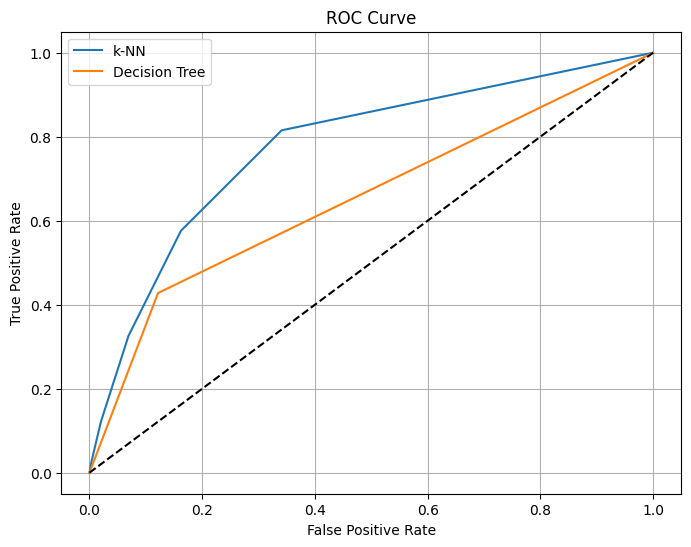

In [14]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='k-NN')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


## 3. Penjelasan Persamaan Matematika Metrik Evaluasi
#### Akurasi (Accuracy)

  Proporsi prediksi yang benar:

  $\text{Akurasi} = \frac{TP + TN}{TP + TN + FP + FN}$

  - TP: True Positive

  - TN: True Negative

  - FP: False Positive

  - FN: False Negative
---
#### Presisi (Precision)

  Kemampuan model memprediksi positif secara benar:

  $\text{Presisi} = \frac{TP}{TP + FP}$
---
#### Recall (Sensitivity / TPR)

  Kemampuan model menemukan semua nilai positif:

  $\text{Recall} = \frac{TP}{TP + FN}$

---
#### F1 Score
Rata-rata harmonik dari presisi dan recall:

  $F1 = 2 \times \frac{\text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}}$

---
#### AUC - ROC (Area Under Curve - Receiver Operating Characteristic)

  - Mengukur kemampuan model membedakan antara kelas positif dan negatif

  - ROC = Grafik TPR vs FPR (False Positive Rate)

$\text{AUC} = \int_0^1 \text{TPR}(\text{FPR}) \, d\text{FPR}$

---




## 4. Kesimpulan: Metrik Terbaik?
- Jika dataset seimbang, akurasi bisa cukup bagus.

- Jika dataset tidak seimbang, F1 Score dan AUC lebih relevan.

- F1 Score bagus saat kita ingin menyeimbangkan presisi dan recall.

- AUC bagus saat kita peduli pada pemisahan kelas.

- Jadi tidak ada metrik yang “selalu terbaik”. Pilihan tergantung konteks:

- Spam detection → Recall penting (jangan sampai ada yang lolos)

- Medical diagnosis → Precision penting (jangan beri false alarm)

- Model umum → F1 Score dan AUC